##  Import and examine data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import os
# os.path.abspath("/Users/regi/Flatiron/mod4_project/data/RISKFACTORSANDACCESSTOCARE.csv")

In [3]:
risk_df = pd.read_csv('/Users/regi/Flatiron/mod4_project/data/RISKFACTORSANDACCESSTOCARE.csv')

In [4]:
risk_df.head(3)

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2


In [5]:
risk_df.shape

(3141, 31)

In [6]:
risk_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'CI_Min_No_Exercise', 'CI_Max_No_Exercise', 'Few_Fruit_Veg',
       'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity', 'CI_Min_Obesity',
       'CI_Max_Obesity', 'High_Blood_Pres', 'CI_Min_High_Blood_Pres',
       'CI_Max_High_Blood_Pres', 'Smoker', 'CI_Min_Smoker', 'CI_Max_Smoker',
       'Diabetes', 'CI_Min_Diabetes', 'CI_Max_Diabetes', 'Uninsured',
       'Elderly_Medicare', 'Disabled_Medicare', 'Prim_Care_Phys_Rate',
       'Dentist_Rate', 'Community_Health_Center_Ind', 'HPSA_Ind'],
      dtype='object')

In [7]:
risk_df = risk_df[risk_df.columns.drop(list(risk_df.filter(regex='Max')))]
risk_df = risk_df[risk_df.columns.drop(list(risk_df.filter(regex='Min')))]

In [8]:
risk_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare',
       'Prim_Care_Phys_Rate', 'Dentist_Rate', 'Community_Health_Center_Ind',
       'HPSA_Ind'],
      dtype='object')

In [9]:
risk_df.shape

(3141, 19)

In [10]:
risk_df.sample(5)

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
3089,55,85,Oneida,Wisconsin,WI,26,21.8,74.3,20.1,-1111.1,25.0,4.9,3001,7728,876,156.8,64.9,2,2
543,13,321,Worth,Georgia,GA,69,34.2,84.3,32.9,-1111.1,26.1,16.8,3701,2102,544,36.4,13.6,2,2
2865,51,97,King and Queen,Virginia,VA,62,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,833,940,177,44.1,14.7,2,1
1731,31,159,Seward,Nebraska,NE,55,20.4,77.0,21.7,21.5,15.0,6.4,1235,2377,190,65.7,35.8,2,2
2024,38,73,Ransom,North Dakota,ND,54,28.4,73.9,24.2,30.8,21.0,6.6,359,1106,89,68.8,34.4,2,2


In [11]:
round(risk_df.describe(), 2)

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
count,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00
mean,30.30,103.72,44.70,-312.13,-389.74,-307.28,-559.87,-292.49,-142.52,12644.81,10878.69,1858.45,57.56,31.45,1.55,1.76
std,15.13,108.00,25.12,520.27,581.55,516.25,568.62,508.39,381.65,54604.78,31387.57,4698.55,44.79,45.61,0.50,0.43
min,1.00,1.00,1.00,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,-2222.00,-2222.00,-2222.00,0.00,-2222.20,1.00,1.00
25%,18.00,35.00,23.00,-1111.10,-1111.10,-1111.10,-1111.10,-1111.10,5.00,1549.00,1607.00,275.00,30.50,18.70,1.00,2.00
50%,29.00,79.00,44.00,22.60,74.00,21.70,-1111.10,20.30,7.00,3426.00,3448.00,690.00,50.60,30.00,2.00,2.00
75%,45.00,133.00,66.00,28.60,80.20,25.80,26.10,25.10,9.10,8116.00,8053.00,1667.00,74.70,43.30,2.00,2.00
max,56.00,840.00,88.00,52.40,96.40,42.60,47.10,46.20,20.80,2167891.00,911590.00,118190.00,581.20,377.90,2.00,2.00


In [12]:
# (risk_df['Uninsured'] == -2222).sum()

In [13]:
# round(risk_df['Uninsured'].loc[risk_df['Uninsured'] != -2222].describe(), 2)

In [14]:
# risk_df['Uninsured'].loc[risk_df['Uninsured'] != -2222].value_counts()

In [15]:
for col in risk_df.columns:
    print(col)
    print(risk_df[col].value_counts())
    print('-------------------------')

State_FIPS_Code
48    254
13    159
51    134
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
40     77
5      75
55     72
42     67
1      67
12     67
46     66
8      64
22     64
36     62
6      58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
2      27
24     24
56     23
34     21
32     17
23     16
4      15
50     14
25     14
33     10
9       8
44      5
15      5
10      3
11      1
Name: State_FIPS_Code, dtype: int64
-------------------------
County_FIPS_Code
1      49
3      49
5      49
9      48
7      47
       ..
381     1
379     1
377     1
375     1
6       1
Name: County_FIPS_Code, Length: 324, dtype: int64
-------------------------
CHSI_County_Name
Washington    32
Jefferson     26
Franklin      25
Jackson       24
Lincoln       24
              ..
Weston         1
Wabasha        1
Levy           1
Eagle          1
Craighead      1
Name:

In [16]:
# OLD
# # columns with placeholder values (-1111.1)
# miss_data_1 = ['No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes']
# # columns with placeholder values (-2222.00)
# miss_data_2 = ['Uninsured', 'Elderly_Medicare', 'Disabled_Medicare']
# #  columns with placeholder values (0.0)
# miss_data_0 = ['Prim_Care_Phys_Rate', 'Dentist_Rate']
# # columns we dont need
# drop_cols = ['Community_Health_Center_Ind', 'HPSA_Ind']

In [17]:
# NEW
# columns with placeholder values (-1111.1)
miss_data_1 = ['No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes']
# columns with placeholder values (-2222.00)
miss_data_2 = ['Uninsured']
# columns we dont need
drop_cols = ['Community_Health_Center_Ind', 'HPSA_Ind', 'Elderly_Medicare', 'Disabled_Medicare', 'Prim_Care_Phys_Rate', 'Dentist_Rate']

In [18]:
def drop_n_plot(df, list_of_cols, value):
    for col in list_of_cols:
        dropped = df[col].loc[(df[col] != value)]
        dropped.hist(bins=20)
        plt.title(col)
        plt.show()
        print(f'{col} values dropped: {df[col].loc[(df[col] == value)].count()}')
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

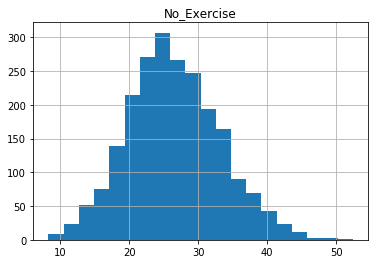

No_Exercise values dropped: 935
Median is 26.0
Mean is 26.50838621940164


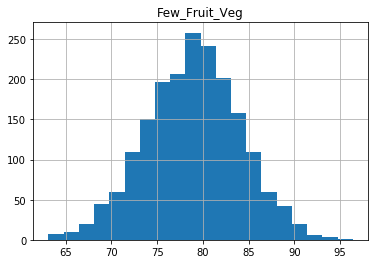

Few_Fruit_Veg values dropped: 1237
Median is 79.0
Mean is 78.92316176470604


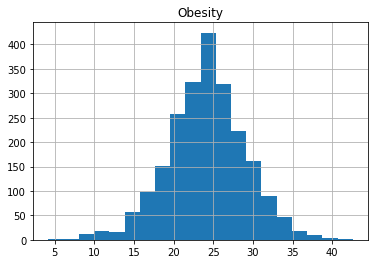

Obesity values dropped: 917
Median is 24.3
Mean is 24.145188848920824


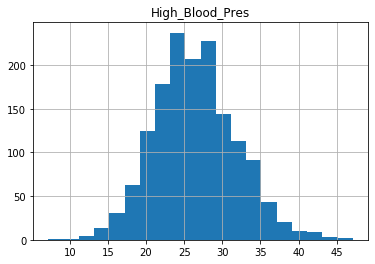

High_Blood_Pres values dropped: 1619
Median is 26.2
Mean is 26.48094612352162


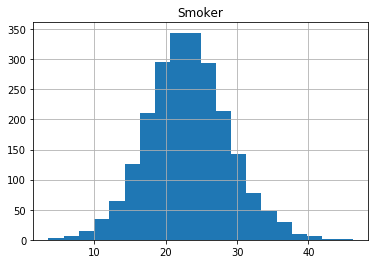

Smoker values dropped: 874
Median is 23.0
Mean is 23.112880458756088


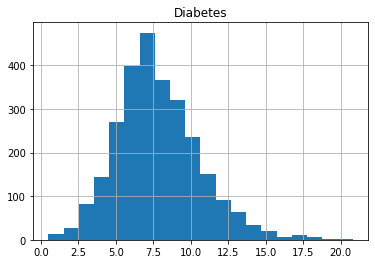

Diabetes values dropped: 422
Median is 7.5
Mean is 7.810187568959173


In [19]:
drop_n_plot(risk_df, miss_data_1, -1111.1)

In [29]:
# Replace the missing values with means
def replace_with_mean(df, col_list, value):
    for col in col_list:
        miss_count = df[col].loc[(df[col] == value)].count()
        dropped = df[col].loc[(df[col] != value)]
        mean = dropped.mean()
        df[col] = df[col].apply(lambda x: mean if x == value else x)
        print(f'Replaced {miss_count} values of {value} in {col} with mean {mean}')

In [21]:
replace_with_mean(risk_df, miss_data_1, -1111.1)

Replaced 935 values of -1111.1 in No_Exercise with mean 26.50838621940164
Replaced 1237 values of -1111.1 in Few_Fruit_Veg with mean 78.92316176470604
Replaced 917 values of -1111.1 in Obesity with mean 24.145188848920824
Replaced 1619 values of -1111.1 in High_Blood_Pres with mean 26.48094612352162
Replaced 874 values of -1111.1 in Smoker with mean 23.112880458756088
Replaced 422 values of -1111.1 in Diabetes with mean 7.810187568959173


In [22]:
replace_with_mean(risk_df, miss_data_2, -2222.0)

Replaced 3 values of -2222.0 in Uninsured with mean 12659.02039515615


In [23]:
risk_df.drop(columns=drop_cols, inplace=True)

In [24]:
risk_df.shape

(3141, 13)

In [25]:
round(risk_df.describe(), 2)

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
count,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00,3141.00
mean,30.30,103.72,44.70,26.51,78.92,24.15,26.48,23.11,7.81,12644.81
std,15.13,108.00,25.12,5.61,4.02,4.13,3.78,4.87,2.57,54604.78
min,1.00,1.00,1.00,8.30,63.10,4.20,7.20,3.60,0.50,-2222.00
25%,18.00,35.00,23.00,23.80,77.90,22.50,26.40,20.90,6.20,1549.00
50%,29.00,79.00,44.00,26.51,78.92,24.15,26.48,23.11,7.81,3426.00
75%,45.00,133.00,66.00,28.60,80.20,25.80,26.48,25.10,9.10,8116.00
max,56.00,840.00,88.00,52.40,96.40,42.60,47.10,46.20,20.80,2167891.00


In [26]:
risk_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,29,27.800000,78.600000,24.500000,29.100000,26.60000,14.2,5690
1,1,3,Baldwin,Alabama,AL,16,27.200000,76.200000,23.600000,30.500000,24.60000,7.2,19798
2,1,5,Barbour,Alabama,AL,51,26.508386,78.923162,25.600000,26.480946,17.70000,6.6,5126
3,1,7,Bibb,Alabama,AL,42,26.508386,86.600000,24.145189,26.480946,23.11288,13.1,3315
4,1,9,Blount,Alabama,AL,28,33.500000,74.600000,24.200000,26.480946,23.60000,8.4,8131


In [27]:
def make_column_hists(df, fig_columns=2, select_columns=None, bin_number=10, figure_size=[14,14]):
    #if a list of columns is passed use that, otherwise use all df columns
    if select_columns is not None:
        column_list = select_columns
    else:
        column_list = df.columns
    # Set matplotlib style
    plt.style.use('ggplot')
    # get number of rows and columns for the figure grid of plots
    df_cols_len = len(column_list)
    fig_rows = df_cols_len // fig_columns
    if df_cols_len % fig_columns != 0:
        fig_rows += 1
    # create fig and subplots
    fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_columns, figsize=figure_size, dpi=100,sharex=False, sharey=False)
    # create a list of subpolot axes
    list_of_axes = []
    if (fig_rows == 1) | (fig_columns == 1):
        for n in range(max([fig_rows, fig_columns])):
            list_of_axes.append(ax[n])
    else:
        for n in range(fig_rows):
            for i in range(fig_columns):
                list_of_axes.append(ax[n,i])
    # plot a histogram on each axes
    for n in range(df_cols_len):
        list_of_axes[n].hist(df[column_list[n]], bins=bin_number)
        list_of_axes[n].set_title(f'{column_list[n]}, dtype:{np.dtype(df[column_list[n]]).name}')


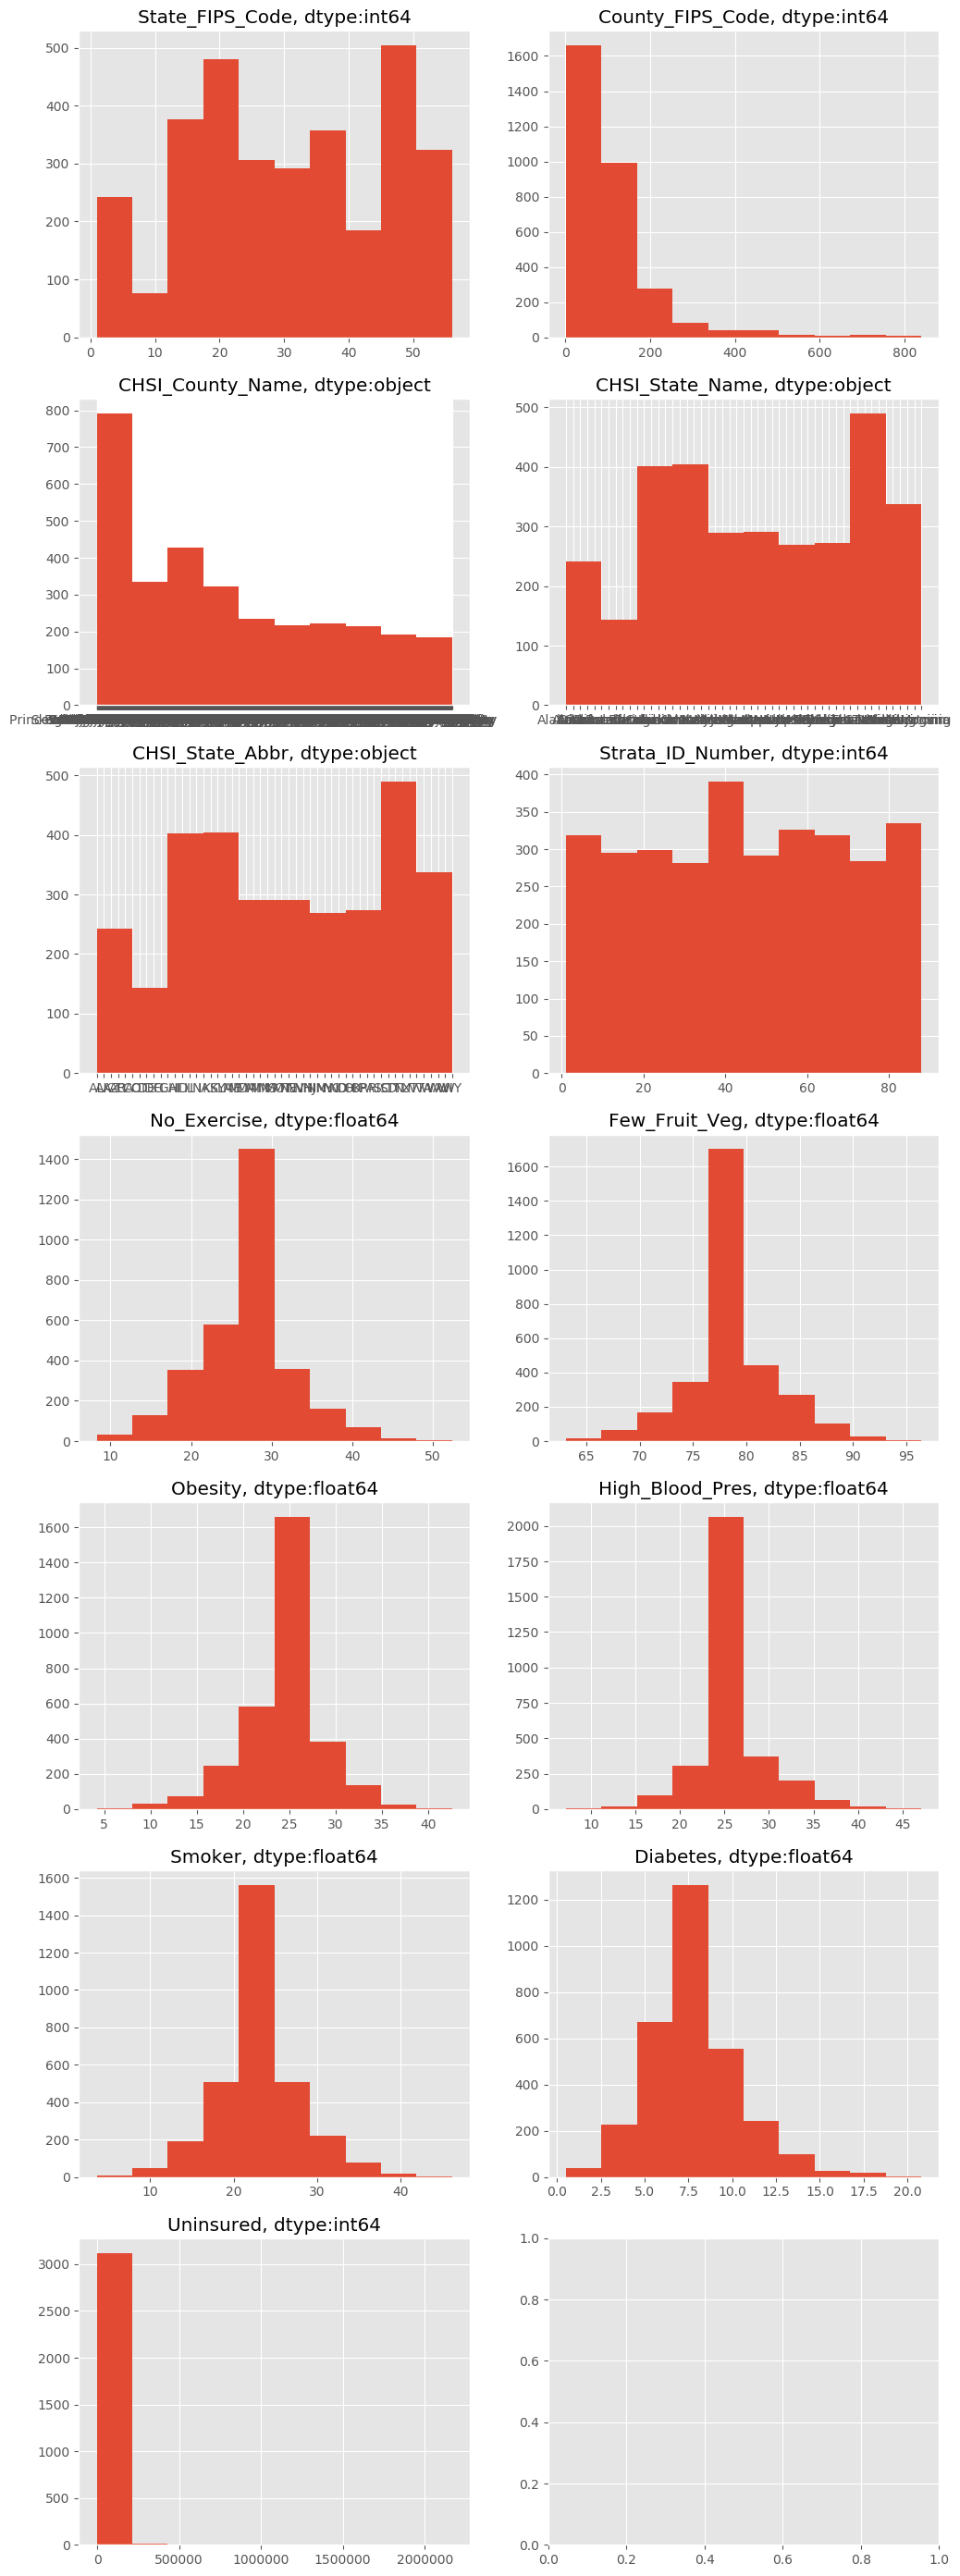

In [28]:
make_column_hists(risk_df, figure_size = [12, 36])